<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 5 - Transformaciones Geométricas



## 1. Transformaciones Geométricas
<ul>
<li>Las Transformaciones Geométricas mantienen el valor de los píxeles, sin embargo, modifican la relación espacial entre ellos.</li>
<li>Para realizar una transformación geométrica se deben realizar dos pasos:</li>
    <ul>
      <li>Definir el mapeo espacial de coordenadas entre la imagen de origen y la imagen de salida (rotación, escala, traslación, ...)</li>
  <li>Aplicar un algoritmo de interpolación para definir el valor de los píxeles que por la transformación han quedado sin valor.</li>
  </ul>
</ul>
<br>
<center><i>Figura. Transformaciones geometricas.</i></center>
<center><img src="res/m3/transformacion_geometrica.png" alt="operaciones" style="height:500px"></img></center>
<br><br>


### Transformación afin
<br>
Las transformaciones afines son un grupo de transformaciones geométricas que preservan ciertas propiedades de las imágenes. Un primer caso de este tipo de transformación consiste en la familia de transformaciones geométricas básicas resultantes de rotaciones, escalamientos y traslaciones.
<br>
<center><i>Figura. Transformación afin.</i></center>
<center><img src="res/m3/transformacion_afin.png" alt="operaciones" style="height:300px"></img></center>
<br>


### Traslación
<br>
La Traslación  es un mapeo en el que cada píxel de la imagen de entrada es movido a una nueva posición en la imagen de salida:
<br>
<center><i>Figura. Traslación.</i></center>
<center><img src="res/m3/traslacion.png" alt="operaciones" style="height:300px"></img></center>
<br>
Una aplicación especial de la Traslación es la reflexión de la imagen:
<br>
<center><i>Figura. Traslación - reflexión.</i></center>
<center><img src="res/m3/traslacion_2.png" alt="operaciones" style="height:300px"></img></center>
<br>

## Implementemos una traslación rudimentaria.

[[  1   0 100]
 [  0   1 100]
 [  0   0   1]]


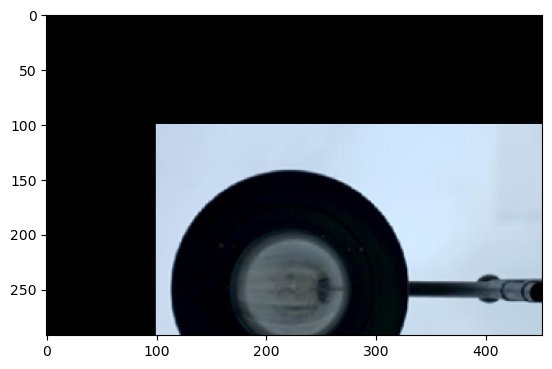

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Se dan valores para translación en x e y
tx = 100
ty = 100

#Generar la matriz de traslación
matriz_traslacion = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
print(matriz_traslacion)

#Leer la imagen y obtener su tamaño
I = cv2.cvtColor(cv2.imread("res/m3/example_3.png"),cv2.COLOR_BGR2RGB)
I_size = np.shape(I)
#Generar una matriz de ceros del mismo tamaño y tipo de datos que I
G = np.zeros(I_size, np.uint8)

#Recorrer todas las componentes i,j de I
for i in range(I_size[0]):
    for j in range(I_size[1]):
        #Realiza la multiplicación de matrices entre la matriz translación y
        #una matriz generada por la iteración
        w = np.matmul( matriz_traslacion, np.array([[i],[j],[1]]))
        #wx y wy son números pertenecientes a la primera y segunda componente de w
        wx = w[0]
        wy = w[1]
        #Condicional doble para filtrar los valores de la translación
        if(wx >= 0 and wx < I_size[0]):
            if(wy >= 0 and wy < I_size[1]):
                G[wx, wy] = I[i, j]

plt.imshow(G, cmap="gray");

<hr>

### Analicemos en clase

<ul>
<li>¿Por que se pierde información en la traslación? ¿Cómo podemos solucionar esto?</li>

</ul>
<hr>

## Utilicemos OpenCv para realizar la traslación

OpenCV recibe una matriz de transformación afin con la siguiente forma (se omite la tercera fila):

<img src="res/afin.png">


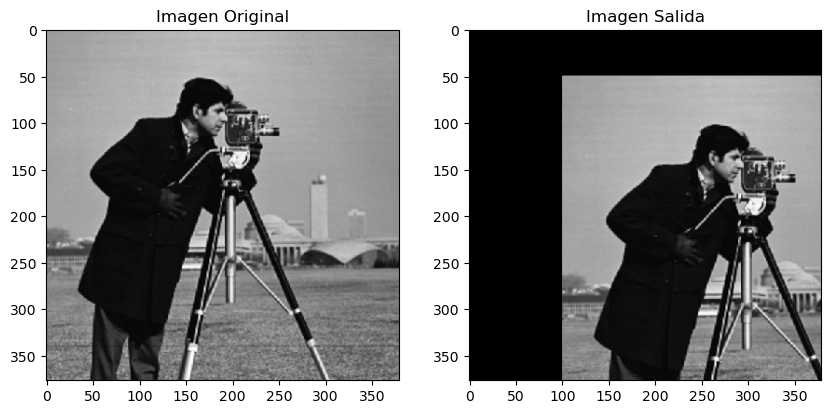

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Se obtienen los vectores filas, columnas
filas,columnas = img.shape
#Se asignan valores a tx y ty, se construye la matriz M de translación
tx = 100
ty = 50
matriz_afin = np.float32([[1,0,tx],
                          [0,1,ty]])

#Transformación de la imagen con base en la matriz M, usando warpAffine
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))# , flags=cv2.INTER_CUBIC)

#Figura 1x2 para mostrar la entrada y la salida
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida");

## Reflexión

La reflexión es un caso especial de la traslación, en la que se manipulan los índices correspondientes a la diagonal principal en la matriz afin.

Al reflejar una imagen, invertimos la posición de todos los elementos de la misma. Sin embargo, esto significa que los valores de intensidad quedan por fuera del espacio matricial original, por lo que se realiza una traslación del número de columnas o filas para devolver la imagen al recuadro.

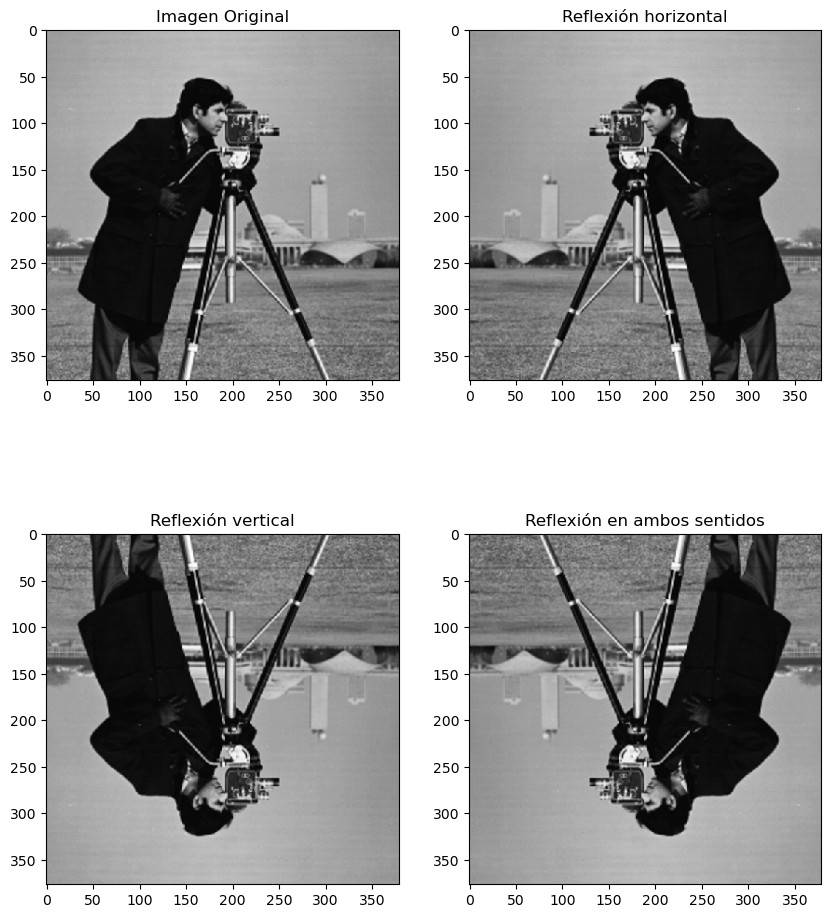

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(img,matriz_afin_ref_x,(columnas,filas))

#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

#Generar la matriz de reflexión simultánea en X & Y
matriz_afin_ref_xy = np.float32([[-1,0,columnas]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación X & Y a la imagen
ref_xy = cv2.warpAffine(img,matriz_afin_ref_xy,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Reflexión horizontal")

plt.subplot(2,2,3)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")

plt.subplot(2,2,4)
plt.imshow(ref_xy,cmap='gray')
plt.title("Reflexión en ambos sentidos");

## Rotación
---
La rotación es un mapeo en que se produce un cambio de orientación de la imagen.
<br>
<center><i>Figura. Rotación.</i></center>
<center><img src="res/m3/rotacion.png" alt="operaciones" style="height:300px"></img></center>

Donde el punto $ (x_0, y_0) $ son las coordenadas del centro de rotación y $\theta$ el ángulo de rotación.
<br>
<center><i>Figura. Rotación - Ejemplos.</i></center>
<center><img src="res/m3/rotacion_2.png" alt="operaciones" style="height:200px"></img></center>
<br>

Un caso especial que se debe considerar es si la imagen de salida debe cambiar para cubrir toda la imagen de entrada.
<br>
<center><i>Figura. Rotación - cambio de tamaño de la imagen de salida.</i></center>
<center><img src="res/m3/rotacion_3.png" alt="operaciones" style="height:300px"></img></center>
<br>
La operación de rotación obligatoriamente implica realizar un proceso de interpolación para corregir casos de coordenadas que no coinciden con posiciones exactas de pixeles en la imagen.

***
OpenCV facilita la función getRotationMatrix2D, la cual nos permite calcular la matriz de transformación afin para cualquier rotación dado un ángulo en grados y el centro de rotación.

<img src="res/matriz_rotacion.png">
<br>
<img src="res/matriz_rotacion_valores.png">

[[ 6.123234e-17 -1.000000e+00  3.780000e+02]
 [ 1.000000e+00  6.123234e-17 -1.000000e+00]]


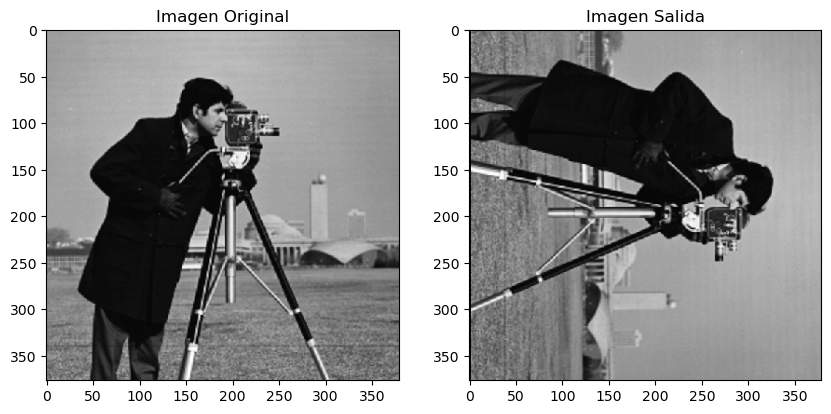

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen de entrada
img =cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#Asignar un ángulo de rotación, +90° sería rotación en sentido anti-horario, -90° en sentido horario
theta = -90

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2, usamos como tercer parámetro 1 debido a que no se requiere escalar la imagen
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Salida");

## Inclinación
---
La inclinación transforma una región rectangular en un rombo. Sirve para “simular” una perspectiva. La inclinación se puede dar en el eje X, en eje Y o en ambos:
<br>
<center><i>Figura. Ejemplos de inclinacion. El valor de inclinación es la tangente del ángulo.</i></center>
<center><img src="res/m3/inclinacion.png" alt="operaciones" style="height:300px"></img></center>
<br>

- La inclinación sobre X en una cantidad $I_x$:  $R(x,y) = A(x - I_x \cdot y, y)$
- La inclinación sobre Y en una cantidad $I_y$:  $R(x,y) = A(x, y - I_y \cdot x)$
- La inclinación sobre X y Y en sus respectivas cantidades:  $R(x,y) = A(x - I_x \cdot y, y - I_y \cdot x)$
<br>

<center><i>Figura. Matriz afin para la inclinacion.</i></center>
<center><img src="res/m3/inclinacion_2.png" alt="operaciones" style="height:300px"></img></center>
<br>
<center><i>Figura. Ejemplos de valores de inclinacion.</i></center>
<center><img src="res/m3/inclinacion_3.png" alt="operaciones" style="height:200px"></img></center>

***

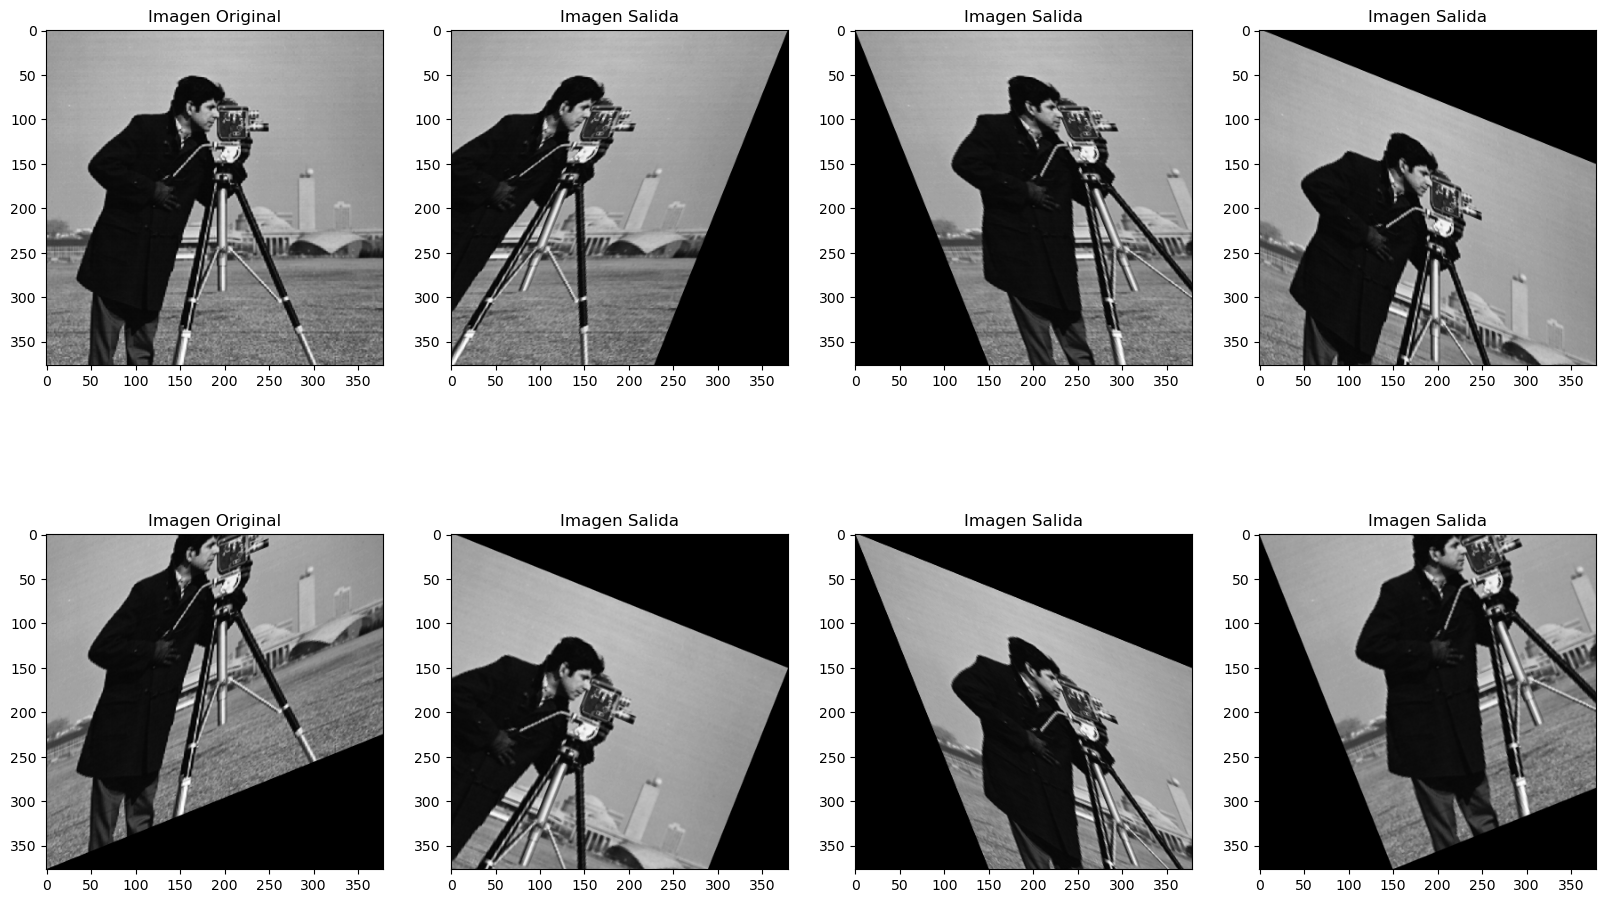

In [5]:
#Lectura de imagen de entrada y obtención de filas y columnas
img = cv2.imread('res/camara.png',cv2.IMREAD_GRAYSCALE)
filas,columnas = img.shape

#Con base en la teoría, crear la matriz M de inclinación
#eemplazando los valores b y d
inc_x = -0.4
inc_y = 0.4
matriz_afin = np.float32([[1,inc_x,0],
                          [0,1,0]])
#Aplicar la matriz generada a la imagen leída
res1 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,-inc_x,0],
                          [0,1,0]])
res2 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,0,0],
                          [inc_y,1,0]])
res3 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,0,0],
                          [-inc_y,1,0]])
res4 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])
res5 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,-inc_x,0],
                          [inc_y,1,0]])
res6 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

matriz_afin = np.float32([[1,-inc_x,0],
                          [-inc_y,1,0]])
res7 = cv2.warpAffine(img,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(20,24))

plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,4,2)
plt.imshow(res1,cmap='gray')
plt.title("Imagen Salida");

plt.subplot(1,4,3)
plt.imshow(res2,cmap='gray')
plt.title("Imagen Salida");

plt.subplot(1,4,4)
plt.imshow(res3,cmap='gray')
plt.title("Imagen Salida");

plt.subplot(2,4,5)
plt.imshow(res4,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,4,6)
plt.imshow(res5,cmap='gray')
plt.title("Imagen Salida");

plt.subplot(2,4,7)
plt.imshow(res6,cmap='gray')
plt.title("Imagen Salida");

plt.subplot(2,4,8)
plt.imshow(res7,cmap='gray')
plt.title("Imagen Salida");

## Escala
---
<br>
La escala permite cambiar el tamaño de las imágenes:
<br>
<center><i>Figura. Escala.</i></center>
<center><img src="res/m3/escala.png" alt="operaciones" style="height:300px"></img></center>
<br>
El grado de calidad de una transformacion de escala, radica en completar la información faltante de forma tal que se mantenga la apariencia visual de la imagen original.
<br>
<br>
<center><i>Figura. Escala - Interpolación.</i></center>
<center><img src="res/m3/escala_2.png" alt="operaciones" style="height:400px"></img></center>

***

La interpolación puede considerarse como el cálculo del valor de intensidad de un píxel, en una posición cualquiera, como una función de los píxeles que la rodean.
<br><br>
Existen diferentes tipos de interpolación:
- Vecino más cercano
- Lineal
- Bilineal
- Bicúbica
- Supermuestreo
<br>

La <b>interpolación del vecino más cercano</b>: $B(x,y) = A(\left \lfloor \frac{x}{10}  \right \rfloor , \left \lfloor \frac{y}{10}  \right \rfloor)$, donde 10 es el factor de escala.
<br>

<b>Ventajas</b>:
<ul>
    <li>Es muy sencilla y rápida de calcular.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>El efecto de cuadriculado es evidente, y da lugar imágenes de poca calidad</li>
    <li>A medida que el factor de escala aumenta, la imagen se hace más y más borrosa</li>
</ul>

***

La <b>interpolación lineal</b> promedia los dos vecinos más cercanos para encontrar el valor del píxel.
<br><br>
<b>Ventajas</b>:
<ul>
    <li>Es muy rápida de calcular y mejora un poco los resultados con respecto a la interpolación por vecino más cercano.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Da lugar imágenes de poca calidad</li>
</ul>
<hr>
La <b>interpolación bilineal</b> es una mejora de la anterior, promediando en este caso 4 pixeles adyacentes. Sin embargo, los factores de ponderación vienen dados por la distancia de los 4 píxeles se que usaran para la interpolación
<br><br>
<b>Ventajas</b>:
<ul>
    <li>Mejora los resultados de la interpolación haciendo los cambios más suaves.</li>
</ul>
<br>
<b>Inconvenientes</b>:
<ul>
    <li>Es más costosa computacionalmente.</li>
</ul>

<center><i>Figura. Interpolación bilineal.</i></center>
<center><img src="res/m3/interpolacion_2.png" alt="interpolacion bilineal" style="height:200px"></img></center>
<br>
<center><i>Figura. Interpolación bilineal.</i></center>
<center><img src="res/m3/interpolacion_3.png" alt="interpolacion bilineal" style="height:120px"></img></center>
<br>
<center><i>Figura. Interpolación bilineal.</i></center>
<center><img src="res/m3/interpolacion_4.png" alt="interpolacion bilineal" style="height:90px"></img></center>
<br>
<center><i>Figura. Interpolación bilineal.</i></center>
<center><img src="res/m3/interpolacion_5.png" alt="interpolacion bilineal" style="height:90px"></img></center>
<br>
<center><i>Figura. Interpolación bilineal.</i></center>
<center><img src="res/m3/interpolacion_6.png" alt="interpolacion bilineal" style="height:70px"></img></center>
<br>
<center><i>Figura. Interpolación bicúbica</i></center>
<center><img src="res/interpolacion_cubica.png"><center>

<center></center>

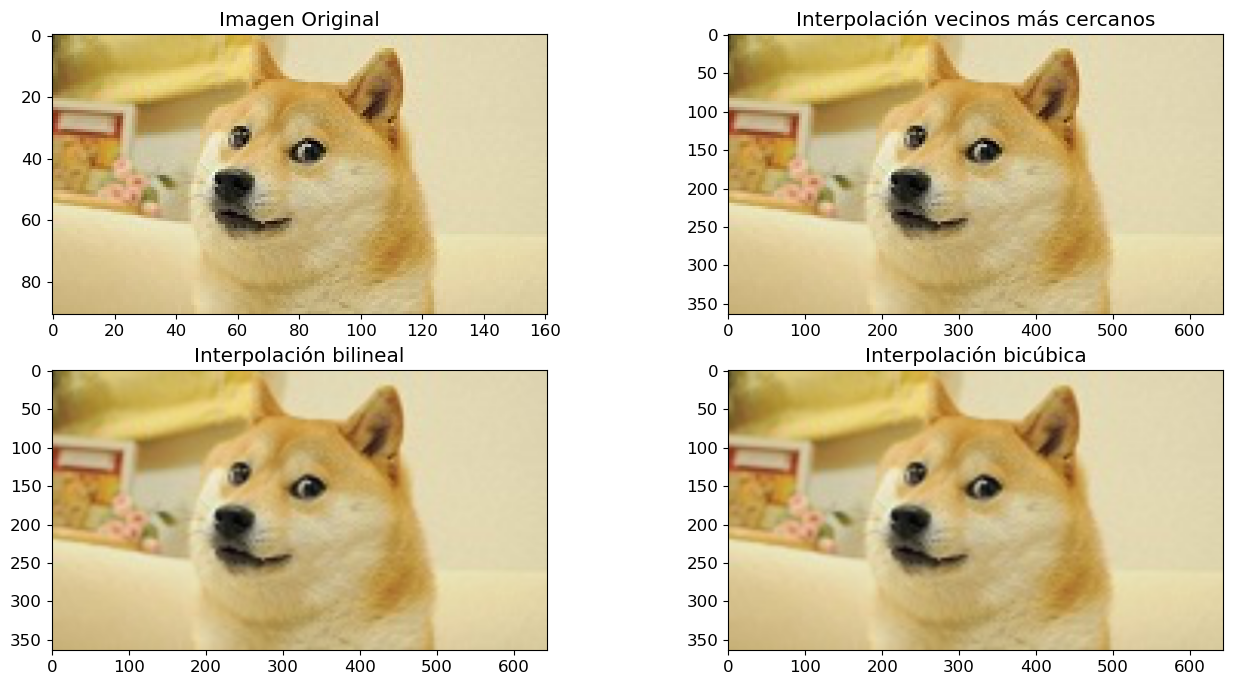

In [10]:
#Leer la imagen de entrada a color y convertirla RGB
img=cv2.imread('res/m3/doge.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

"""Acercar la imagen de entrada con base en una aproximación de vecinos cercanos o interpolación bilinear/bicúbica
se puede especificar en una tupla las dimensiones exactas deseadas, o bien, usar factores de escala fx y fy"""
nearest = cv2.resize(img,(img.shape[1]*4, img.shape[0]*4), interpolation = cv2.INTER_NEAREST)
bilinear = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_LINEAR)
bicubic = cv2.resize(img,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

#Generar figura 2x2 para mostrar y contrastar las aproximaciones con la imagen original
fig = plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 12})
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(nearest,cmap='gray')
plt.title("Interpolación vecinos más cercanos")

plt.subplot(2,2,3)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bilineal")

plt.subplot(2,2,4)
plt.imshow(bilinear,cmap='gray')
plt.title("Interpolación bicúbica")

#Guardar las imágenes en la carpeta del notebook
nearest = cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB)
bilinear = cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB)
bicubic = cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB)

cv2.imwrite("nearest.jpg", nearest);
cv2.imwrite("bilinear.jpg", bilinear);
cv2.imwrite("bicubic.jpg", bicubic);